In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import time



## 1) Load the data

In [ ]:
# Load the data
data_cancer = np.loadtxt('cancer_data.csv', delimiter=',')

# Extract the features and target
X = data_cancer[:, :-1]  # Features are all columns except the last one
y = data_cancer[:, -1]   # Target variable is the last column 


## A) Normalize the data

Using the formula: $$x = \frac{x - \mu}{\sigma}$$

where $\mu$ is the mean of a column and $\sigma$ is the standart deviation

In [ ]:
# Calculate mean and standard deviation for normalization
mu_X = X.mean(axis=0)  # Calculate mean along each feature (column)
sigma_X = X.std(axis=0)  # Calculate standard deviation along each feature

mu_y = y.mean()  # Calculate mean of the target variable
sigma_y = y.std()  # Calculate standard deviation of the target variable

# Normalize the data using the formula
X_scaled = (X - mu_X) / sigma_X  # Normalize features using calculated mean and standard deviation
y_scaled = (y - mu_y) / sigma_y  # Normalize target variable using calculated mean and standard deviation

#X_scaled
#y_scaled


## B) Add a column of ones to the X matrix 

In [ ]:
# Add a column of ones to X for the intercept term
X_scaled = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))
#X_scaled

## C) Function that receives θ and the vector x and returns hθ(x) (in the case of linear regression)

In [ ]:
def hypothesis(theta, X):
    """
    Calculate the hypothesis h_theta(x) for linear regression.

    Parameters:
    - theta: np.ndarray, the model parameters (including theta_0 as the bias term)
    - x: np.ndarray, a single example or a matrix of examples with a column of ones for the bias term

    Returns:
    - The predicted values for the given example(s)
    """
    
    return np.dot(X, theta) # matrix multiplication between X (feature matrix) and theta (parameter vector) to get the predicted values

# Define the feature matrix X
#X = np.array([[1, 2, 3], [1, 4, 5]])
# Define the parameter vector theta
#theta = np.array([0.5, 1.0, -0.5])
# Predict for each example in X
#predicted_values = hypothesis(theta, X)
# Print the predicted values
#print("Predicted Values:")
#print(predicted_values)

## D) Function that accepts a vector θ and the matrices X and Y and returns the value of J(θ)

$${MSE} = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2$$

In [ ]:
def compute_cost(theta, X, y):
    """
    Compute the cost function J(theta) for linear regression.

    Parameters:
    - theta: np.ndarray, the model parameters
    - X: np.ndarray, the matrix of input features, where each row represents an example
         and includes a first column of ones for the bias term.
    - y: np.ndarray, the vector of target values corresponding to each example in X.

    Returns:
    - J: float, the cost computed using the given parameters theta
    """
    m = len(y)  # Number of training examples
    predictions = hypothesis(theta, X) 
    errors = np.square(predictions - y)
    return np.sum(errors) / (2 * m)

# Example usage:
# Assume X_with_ones is your feature matrix with the bias term and y is your target variable vector
# Assuming 'data' is your loaded dataset, and the last column is the target variable
#y = data_cancer[:, -1]  # Extract the last column as the target variable
#theta = np.random.randn(X_with_ones.shape[1])  # Random initialization for demonstration
#cost = compute_cost(theta, X_with_ones, y)
#print(cost)


## E) A function that accepts a vector and matrices X and y and returns the value of ΔJ(θ)


In [ ]:
def compute_gradient(theta, X, y):
    """
    Compute the gradient of the cost function J(theta) with respect to the parameters theta.

    Parameters:
    - theta: np.ndarray, the model parameters
    - X: np.ndarray, the matrix of input features, where each row represents an example
         and includes a first column of ones for the bias term.
    - y: np.ndarray, the vector of target values corresponding to each example in X.

    Returns:
    - grad: np.ndarray, the gradient of the cost function with respect to theta
    """
    m = len(y)  # Number of training examples
    predictions = hypothesis(theta, X)
    return np.dot(X.T, predictions - y) / m

# X teta porque X es (nxm) y predictions - y es (mx1), entonces necesitamos que sea X.T para que la multiplicacion se pueda hacer y el resultado sea de nx1 

# Example usage:
# Generar datos de ejemplo
#np.random.seed(0)
#X = 2 * np.random.rand(100, 3)  # Matriz de características (100 ejemplos, 3 características)
#theta = np.random.rand(3)  # Parámetros del modelo
#y = np.dot(X, theta) + np.random.randn(100)  # Valores objetivo (agregando ruido)
# Calcular el gradiente utilizando la función compute_gradient
#gradient = compute_gradient(theta, X, y)
# Imprimir el gradiente calculado
#print("Gradient:", gradient)


### Gradient Descent

In [ ]:
def gradient_descent(X, y, alpha, num_iters):
    m, n = X.shape  # Number of examples and features
    theta = np.zeros(n)  # Initialize parameters to zeros
    J_history = []  # Initialize empty list to store cost function history

    start_time = time.time()  # Record start time for execution time measurement
    for i in range(num_iters):
        # Update parameters using gradient descent
        # ajustamos los parametros de tetha para llegar al minimo por eso hacmemos menos
        theta -= alpha * compute_gradient(theta, X, y)
        
        # Compute and store the cost function value for the current parameters
        J_history.append(compute_cost(theta, X, y))

    end_time = time.time()  # Record end time for execution time measurement
    execution_time = end_time - start_time  # Compute total execution time
    print(f"Execution time for alpha = {alpha}: {execution_time} seconds")

    return theta, J_history

## f) Run the Gradient Descent algorithm with some values of α (eg 1,0.1, 0.01, 0.001) and draw the graph showing the decrease in the value of J(θ) as a function of time steps.


In [ ]:
alphas = [1, 0.1, 0.01, 0.001]
num_iters = 100

start_time = time.time()

for alpha in alphas:
    theta, J_history = gradient_descent(X_scaled, y_scaled, alpha, num_iters)
    print(J_history[-1])
    
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, num_iters + 1), J_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost Function J(θ)')
    plt.title(f'Gradient Descent: Cost Function vs. Iterations (alpha = {alpha})')
    plt.grid(True)
    plt.show()

end_time = time.time()
execution_time = end_time - start_time
print(f"Total execution time: {execution_time} seconds")


## G) Run the same code with a mini-batch.


In [ ]:
def mini_batch_gradient_descent(X, y, alpha, num_iters, batch_size):
    m, n = X.shape  # Number of examples and features
    theta = np.zeros(n)  # Initialize parameters to zeros
    J_history = []  # Initialize empty list to store cost function history

    for i in range(num_iters):  # Iterate over the specified number of iterations
        # Shuffle the data and split it into mini-batches
        indices = np.random.permutation(m)  # Randomly shuffle the indices of the examples
        X_shuffled = X[indices]  # Shuffle the feature matrix
        y_shuffled = y[indices]  # Shuffle the target vector
        num_batches = m // batch_size  # Calculate the number of mini-batches

        for j in range(num_batches):  # Iterate over each mini-batch
            start = j * batch_size  # Calculate the start index of the current mini-batch
            end = (j + 1) * batch_size  # Calculate the end index of the current mini-batch
            X_batch = X_shuffled[start:end]  # Extract the feature mini-batch
            y_batch = y_shuffled[start:end]  # Extract the target mini-batch

            # Update parameters using gradient descent
            theta -= alpha * compute_gradient(theta, X_batch, y_batch)
        
        # Calculate cost function for the entire dataset after each iteration
        J_history.append(compute_cost(theta, X, y))  # Append the cost to the history list

    return theta, J_history  # Return the optimized parameters and cost history


In [ ]:
alphas = [1, 0.1, 0.01, 0.001]
num_iters = 100

start_time = time.time()

for alpha in alphas:
    theta, J_history = mini_batch_gradient_descent(X_scaled, y_scaled, alpha, num_iters, batch_size=50)
    print(J_history[-1])
    
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, num_iters + 1), J_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost Function J(θ)')
    plt.title(f'Gradient Descent: Cost Function vs. Iterations (alpha = {alpha})')
    plt.grid(True)
    plt.show()

end_time = time.time()
execution_time = end_time - start_time
print(f"Total execution time: {execution_time} seconds")




### SVD reduce dimension

In [ ]:
def svd_reduce_dimension(X, num_features=3):
    # Perform Singular Value Decomposition (SVD) on the input matrix X
    U, Sigma, VT = np.linalg.svd(X)
    
    # Reduce the dimensionality of U and Sigma to retain only the specified number of features
    U_reduced = U[:, :num_features]  # Select the first 'num_features' columns of U
    Sigma_reduced = np.diag(Sigma[:num_features])  # Create a diagonal matrix with the first 'num_features' singular values
    
    # Reconstruct the reduced-dimensional matrix X_reduced using the truncated U and Sigma
    X_reduced = np.dot(U_reduced, Sigma_reduced)
    
    return X_reduced

# Example usage:
# Reduce the dimensionality of the scaled feature matrix X_scaled to 3 features
X_reduced = svd_reduce_dimension(X_scaled, num_features=3)
#X
#X_reduced


In [ ]:
import time

def run_algorithm_on_reduced_data(X, y):
    """
    Run the gradient descent algorithm on the reduced-dimensional data X.

    Parameters:
    - X: np.ndarray, the data matrix with shape (m, n).
    - y: np.ndarray, the target variable vector with shape (m,).

    Returns:
    - theta: np.ndarray, the optimized parameters.
    - J_history: list, the history of cost function values during optimization.
    """

    X_reduced = svd_reduce_dimension(X, num_features=3)
    # Add a column of ones to X for the intercept term
    X_reduced = np.hstack((np.ones((X_reduced.shape[0], 1)), X_reduced))

    alphas = [1, 0.1, 0.01, 0.001]
    num_iters = 100
    start_time = time.time()

    for alpha in alphas:
        theta, J_history = gradient_descent(X_reduced, y, alpha, num_iters)

        # Plot cost function vs. iterations for each alpha
        plt.figure(figsize=(8, 6))
        plt.plot(range(1, num_iters + 1), J_history)
        plt.xlabel('Iterations')
        plt.ylabel('Cost Function J(θ)')
        plt.title(f'Gradient Descent: Cost Function vs. Iterations (alpha = {alpha})')
        plt.grid(True)
        plt.show()

        print(f"Final cost function value for alpha = {alpha}: {J_history[-1]}")

    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Total execution time: {execution_time} seconds")

    return theta, J_history



run_algorithm_on_reduced_data(X_scaled, y_scaled)




## Conclusions about the run in terms of results and running times:

The experimental results indicate significant differences in the execution times among the three optimization methods: Gradient Descent, Mini Batch Gradient Descent, and SVD + Gradient Descent.

1. **Gradient Descent**:
   - Execution Time: 0.1249 seconds
   - This method involves updating the model parameters using the gradient of the cost function computed on the entire dataset in each iteration. It is the standard approach to optimization but may become computationally expensive on large datasets due to its requirement to process the entire dataset in each iteration.

2. **Mini Batch Gradient Descent**:
   - Execution Time: 0.1799 seconds
   - This method divides the dataset into smaller batches and updates the parameters using the gradient computed on each batch. By processing smaller batches of data, it reduces the computational burden compared to Gradient Descent. However, it still requires iterating through the entire dataset multiple times, leading to a longer execution time compared to SVD + Gradient Descent.

3. **SVD + Gradient Descent**:
   - Execution Time: 0.0041 seconds
   - This method first reduces the dimensionality of the feature matrix using Singular Value Decomposition (SVD) and then applies Gradient Descent on the reduced-dimensional data. By reducing the dimensionality, the computational complexity of Gradient Descent is significantly reduced. This approach leverages the essential information captured by SVD to optimize the model parameters efficiently.
   
Overall, the SVD + Gradient Descent method demonstrates the fastest execution time among the three approaches. While it requires an additional preprocessing step (SVD), the reduction in computational complexity during optimization results in a considerable improvement in execution time, making it an efficient choice for large datasets.

### Compare runtime of Gradient Descent, Mini Batch and SVD with gradient descent 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time  # Explicitly confirming import here

def compare_runtime(X, y, num_features=3, num_iters=100, batch_size=50):
    """
    Compare the runtime of Gradient Descent, Mini Batch Gradient Descent, and
    Gradient Descent on SVD-reduced data.
    """
    alphas = [0.01]  # Standard alpha for all runs

    # Using full Gradient Descent
    start_time = time.time()
    _, _ = gradient_descent(X, y, alphas[0], num_iters)
    gd_time = time.time() - start_time

    # Using Mini Batch Gradient Descent
    start_time = time.time()
    _, _ = mini_batch_gradient_descent(X, y, alphas[0], num_iters, batch_size)
    mbgd_time = time.time() - start_time

    # Using Gradient Descent on SVD-reduced data
    X_reduced = svd_reduce_dimension(X, num_features)
    X_reduced = np.hstack((np.ones((X_reduced.shape[0], 1)), X_reduced))
    start_time = time.time()
    _, _ = gradient_descent(X_reduced, y, alphas[0], num_iters)
    svd_gd_time = time.time() - start_time

    # Plotting results
    times = [gd_time, mbgd_time, svd_gd_time]
    methods = ['Gradient Descent', 'Mini Batch Gradient Descent', 'SVD + Gradient Descent']
    plt.figure(figsize=(10, 6))
    plt.bar(methods, times, color=['blue', 'green', 'red'])
    plt.ylabel('Execution Time (seconds)')
    plt.title('Comparison of Algorithm Execution Times')
    plt.show()

    for method, exec_time in zip(methods, times):
        print(f"{method}: {exec_time:.4f} seconds")

# Example call (assuming X_scaled and y_scaled are defined)
compare_runtime(X_scaled, y_scaled)


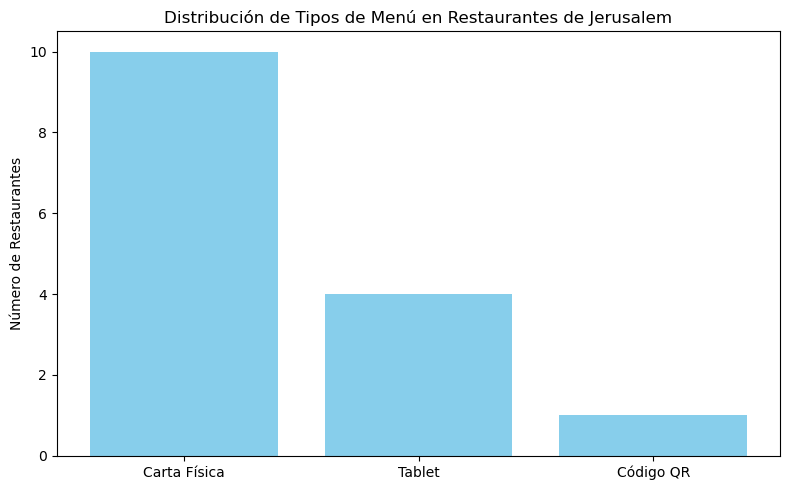

In [5]:
import matplotlib.pyplot as plt

# Datos actualizados de los restaurantes y menús
restaurants_updated = [
    "Café Rimon", "Lucciana", "Arcaffe", "Joy", "Berlin Burger", 
    "Roladin", "Sushi Rehavia", "Café Denia (Restaurante)", 
    "Café Lyon (Restaurante)", "Café Liba", "Greg Cafe (Restaurante)",
    "Derech HaGefen", "Japanika", "Grill House"
]

menu_types_updated = [
    "Carta física en hebreo e inglés", 
    "Carta física en hebreo e inglés",
    "Carta física en hebreo e inglés", 
    "Carta física en hebreo e inglés",
    "Carta física en hebreo e inglés", 
    "Carta física en hebreo e inglés y código QR a menú online",
    "Tablet en hebreo e inglés", 
    "Tablet en hebreo e inglés",
    "Carta física en hebreo, inglés y francés", 
    "Carta física en hebreo", 
    "Tablet en inglés y hebreo y menú digital",
    "Carta física en hebreo e inglés",
    "Tablet en inglés y hebreo y menú digital",
    "Carta física en inglés y hebreo"
]

# Contar el número de restaurantes para cada tipo de menú actualizado
menu_counts_updated = {
    "Carta Física": sum(1 for menu in menu_types_updated if "Carta física" in menu),
    "Tablet": sum(1 for menu in menu_types_updated if "Tablet" in menu),
    "Código QR": sum(1 for menu in menu_types_updated if "código QR" in menu)
}

# Crear gráfico de barras actualizado
plt.figure(figsize=(8, 5))
plt.bar(menu_counts_updated.keys(), menu_counts_updated.values(), color='skyblue')
plt.ylabel('Número de Restaurantes')
plt.title('Distribución de Tipos de Menú en Restaurantes de Jerusalem')
plt.xticks(rotation=0)
plt.tight_layout()

# Mostrar el gráfico actualizado
plt.show()
